# Load dataset from UCI ML datasets website

In [1]:
import pandas as pd
IrisFromUCI = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
IrisFromUCI.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
IrisFromUCI.to_csv('IrisFromUCI.csv', index=None)

In [2]:
IrisFromUCI.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Load necessary libraries to create a sequential neural network in keras

In [3]:
from sklearn.model_selection import train_test_split #to split data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [4]:
X = pd.read_csv('IrisFromUCI.csv').drop(['Species'], axis=1)
y = IrisFromUCI['Species']

In [5]:
# Convert y into an integer 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)
X_train = X_train.values
X_test = X_test.values

# Convert the split data into the format that Keras likes

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
model1 = Sequential() #Sequential Object
model1.add( Dense( 64, activation = 'relu', input_shape= X_train[0].shape))
model1.add( Dense (128, activation = 'relu'))
model1.add( Dense (128, activation = 'relu'))
model1.add( Dense (128, activation = 'relu'))
model1.add( Dense (128, activation = 'relu'))
model1.add( Dense (64, activation = 'relu'))
model1.add( Dense (64, activation = 'relu'))
model1.add( Dense (64, activation = 'relu'))
model1.add( Dense (64, activation = 'relu'))
model1.add( Dense (3, activation = 'softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history2 = model1.fit(X_train, y_train, epochs=800, validation_split=0.1, batch_size=40)

# model2 = Sequential()
# model2.add(Dense(64, activation = 'relu', input_shape= X_train[0].shape))
# model2.add( Dense(128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add(tf.keras.layers.Dropout(0.5))
# model2.add( Dense (128, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add(Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add(tf.keras.layers.Dropout(0.5))
# model2.add( Dense (64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# model2.add( Dense (3, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

# model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# history2 = model2.fit(X_train, y_train, epochs=800, validation_split=0.1, batch_size=40)



Epoch 1/800
4/4 [==============================] - 0s 57ms/step - loss: 1.0883 - acc: 0.6612 - val_loss: 1.0444 - val_acc: 0.5714
Epoch 2/800
4/4 [==============================] - 0s 14ms/step - loss: 1.0060 - acc: 0.6694 - val_loss: 0.9708 - val_acc: 0.5714
Epoch 3/800
4/4 [==============================] - 0s 9ms/step - loss: 0.8851 - acc: 0.8099 - val_loss: 0.8587 - val_acc: 0.7857
Epoch 4/800
4/4 [==============================] - 0s 11ms/step - loss: 0.7051 - acc: 0.9174 - val_loss: 0.8676 - val_acc: 0.5714
Epoch 5/800
4/4 [==============================] - 0s 10ms/step - loss: 0.6266 - acc: 0.6694 - val_loss: 0.6057 - val_acc: 0.8571
Epoch 6/800
4/4 [==============================] - 0s 12ms/step - loss: 0.5059 - acc: 0.9091 - val_loss: 0.5057 - val_acc: 0.8571
Epoch 7/800
4/4 [==============================] - 0s 11ms/step - loss: 0.3207 - acc: 0.9752 - val_loss: 0.4115 - val_acc: 0.9286
Epoch 8/800
4/4 [==============================] - 0s 12ms/step - loss: 0.2442 - acc: 0.966

In [11]:
model1.summary()

# model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 64)               

In [13]:
model1.evaluate(X_test, y_test)

# model2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.0048 - acc: 1.0000


[0.004762428812682629, 1.0]

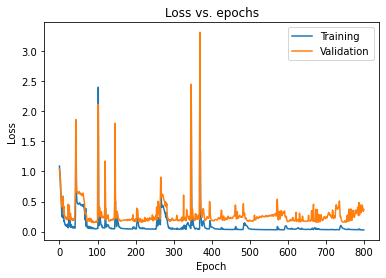

In [14]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()
